<a href="https://colab.research.google.com/github/yunuxemre/Data-Mining-Example/blob/master/TitanikVeriAnaliziV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('TitanicV2.csv')

In [3]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


<ipython-input-5-fa98737cc4ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_c.loc[:, 'survived'] = titanic_c['survived'].map({0:'No', 1:'Yes'})


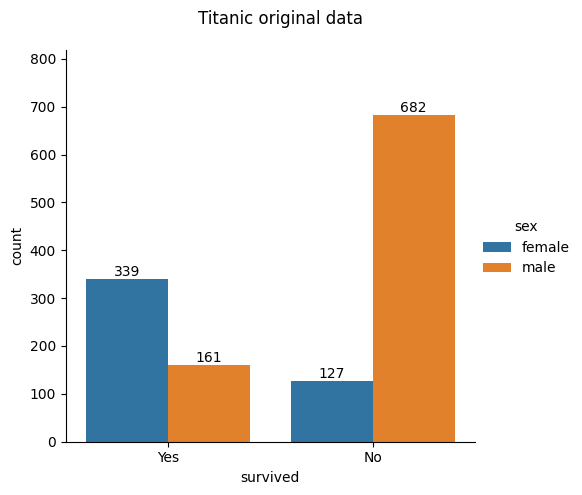

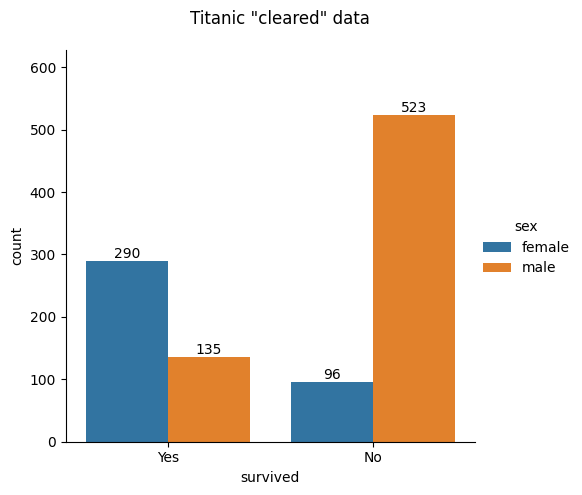

In [5]:
titanic_c = titanic.dropna(subset=['age','embarked'])

titanic.loc[:, 'survived'] = titanic['survived'].map({0:'No', 1:'Yes'})
titanic_c.loc[:, 'survived'] = titanic_c['survived'].map({0:'No', 1:'Yes'})


g1 = sns.catplot(x = 'survived', data = titanic, kind = 'count', hue = 'sex', legend = True)

# iterate through axes (taken from the internet)
for ax in g1.axes.ravel():

    # add annotations (taken from the internet)
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle('Titanic original data')

g2 = sns.catplot(x = 'survived', data = titanic_c, kind = 'count', hue = 'sex')

# iterate through axes (taken from the internet)
for ax in g2.axes.ravel():

    # add annotations (taken from the internet)
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)

g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle('Titanic "cleared" data')

plt.show()

In [6]:
titanic[['age', 'sex']].groupby('sex').mean()

,age
sex,
female,28.687071
male,30.585233


In [7]:
titanic[['age', 'sex']].groupby('sex').min()

,age
sex,
female,0.1667
male,0.3333


In [8]:
titanic[['age', 'sex']].groupby('sex').max()

,age
sex,
female,76.0
male,80.0


<Axes: xlabel='sex', ylabel='age'>

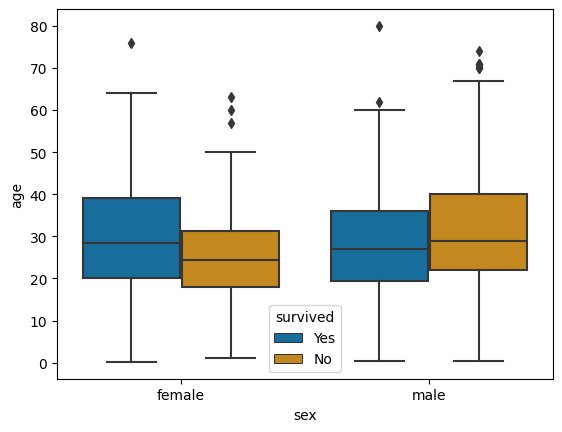

In [9]:
sns.boxplot(data=titanic, x='sex', y='age', hue='survived', palette='colorblind')


<Axes: xlabel='sex', ylabel='age'>

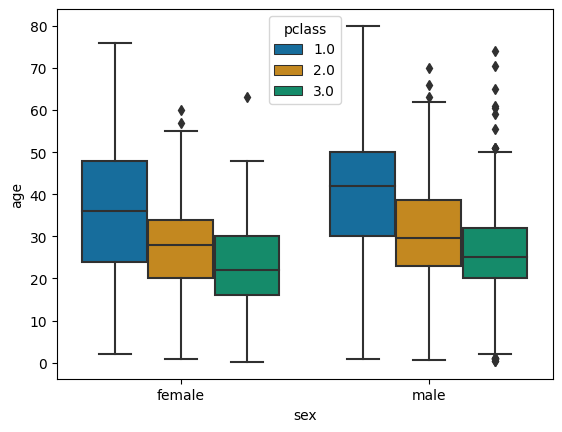

In [10]:
sns.boxplot(titanic, x = 'sex', y = 'age', hue = 'pclass', palette = 'colorblind')

<Axes: xlabel='pclass', ylabel='fare'>

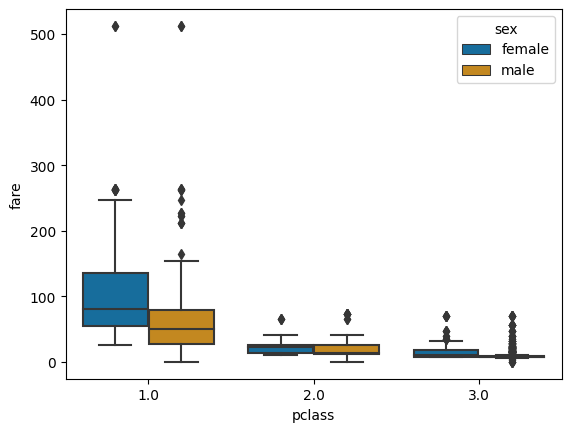

In [11]:
sns.boxplot(titanic, x = 'pclass', y = 'fare', hue = 'sex', palette = 'colorblind')

In [12]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,Yes,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,Yes,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,No,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,No,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,No,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,Yes,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,Yes,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,No,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,Yes,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,No,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [13]:
titanic['age'].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [14]:
def remove_outliers_iqr(data, column_name):
    q1 = titanic['age'].quantile(0.25)
    q3 = titanic['age'].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.3 * iqr
    titanic_age_cleaned = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]
    return titanic_age_cleaned
titanic_age_cleaned = remove_outliers_iqr(titanic, 'age')

print("Before removing outliers:")
print(titanic['age'].describe())

print("\nAfter removing outliers:")
print(titanic_age_cleaned['age'].describe())

Before removing outliers:
count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

After removing outliers:
count    1024.000000
mean       29.075358
std        13.447945
min         0.166700
25%        21.000000
50%        28.000000
75%        38.000000
max        62.000000
Name: age, dtype: float64


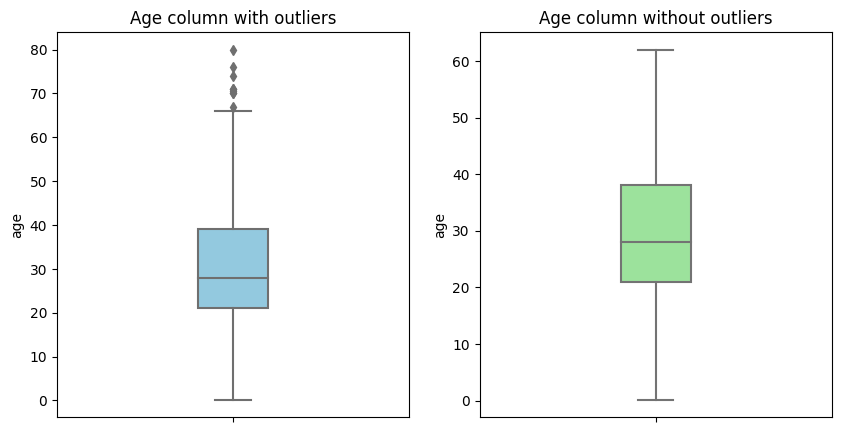

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'age', width = .2, color = 'skyblue')
axes[0].set_title('Age column with outliers')

sns.boxplot(ax = axes[1], data = titanic_age_cleaned, y = 'age', width = .2, color = 'lightgreen')
axes[1].set_title('Age column without outliers')

plt.show()

In [16]:
def remove_outliers_std(data, column_name):
    mean = titanic['fare'].mean()
    std = titanic['fare'].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 4 * std
    titanic_fare_cleaned = titanic[(titanic['fare'] >= lower_bound) & (titanic['fare'] <= upper_bound)]

    return titanic_fare_cleaned

titanic_fare_cleaned = remove_outliers_std(titanic, 'fare')

print("Before removing outliers:")
print(titanic['fare'].describe())

print("\nAfter removing outliers:")
print(titanic_fare_cleaned['fare'].describe())

Before removing outliers:
count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

After removing outliers:
count    1288.000000
mean       28.993775
std        36.748888
min         0.000000
25%         7.895800
50%        14.254150
75%        30.070800
max       227.525000
Name: fare, dtype: float64


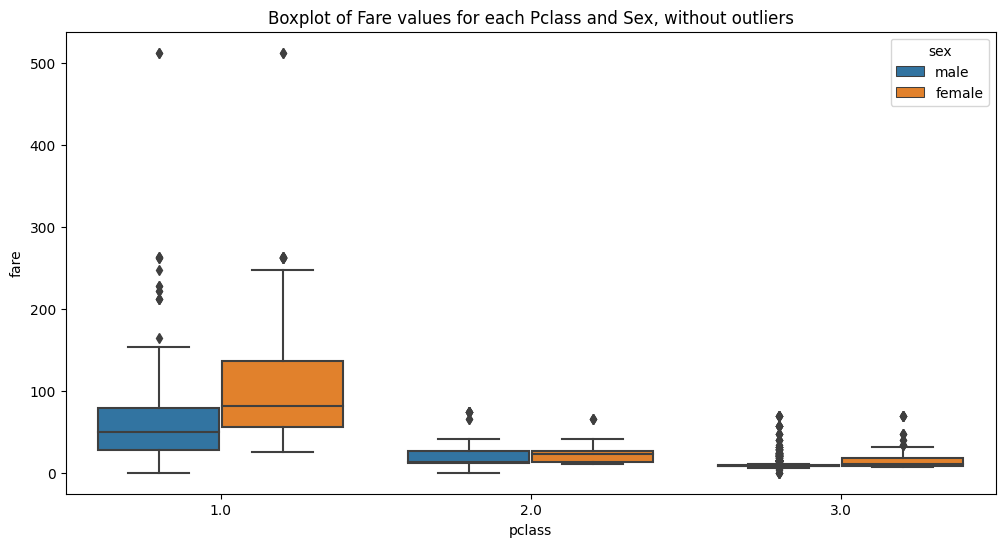

In [17]:
import seaborn as sns

# Boxplot of 'Fare' values for each 'pclass' and 'sex', without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic, hue_order=['male', 'female'])
plt.title('Boxplot of Fare values for each Pclass and Sex, without outliers')
plt.show()

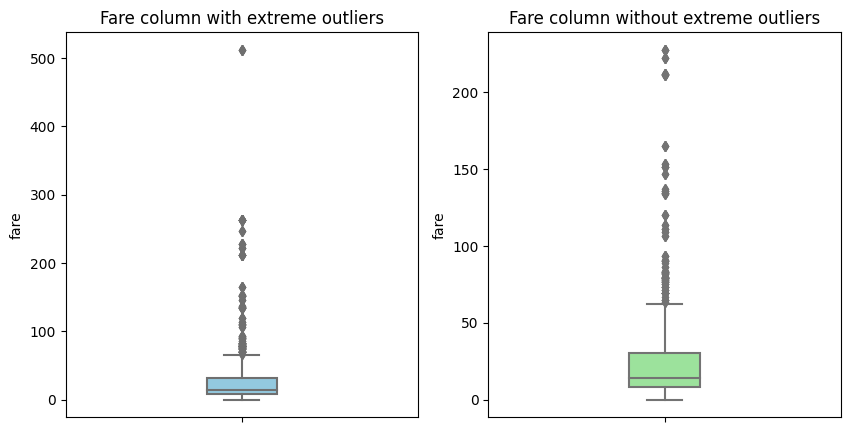

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(ax = axes[0], data = titanic, y = 'fare', width = .2, color = 'skyblue')
axes[0].set_title('Fare column with extreme outliers')

sns.boxplot(ax = axes[1], data = titanic_fare_cleaned, y = 'fare', width = .2, color = 'lightgreen')
axes[1].set_title('Fare column without extreme outliers')

plt.show()

In [19]:
mean = titanic_fare_cleaned['fare'].mean()
std = titanic_fare_cleaned['fare'].std()
threshold = mean + 2.5 * std
print(threshold) # We can adjust the multiplier as needed

titanic_fare_cleaned.loc[titanic_fare_cleaned['fare'] > threshold, 'fare'] = threshold
titanic = titanic_fare_cleaned


print("\nAfter removing outliers:")
print(titanic_fare_cleaned['fare'].describe())

120.86599419417084

After removing outliers:
count    1288.000000
mean       27.074910
std        29.056440
min         0.000000
25%         7.895800
50%        14.254150
75%        30.070800
max       120.865994
Name: fare, dtype: float64


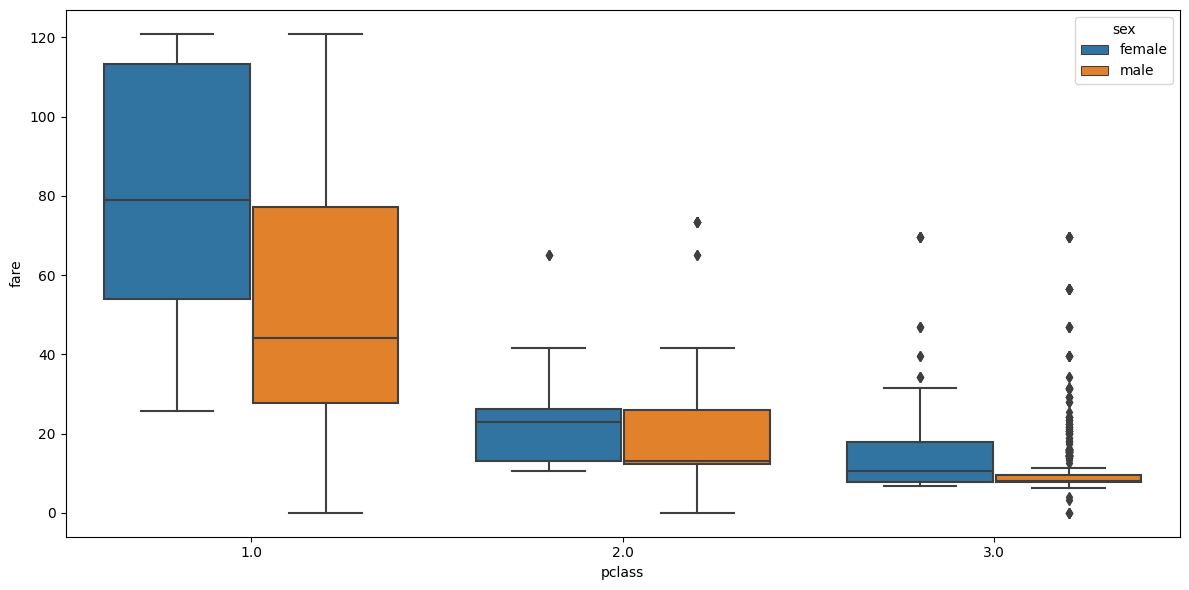

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic)

plt.tight_layout()

plt.show()


After removing values above 30:
count    216.000000
mean      13.981194
std        7.479824
min        6.750000
25%        7.775000
50%       10.489600
75%       17.850000
max       30.000000
Name: fare, dtype: float64


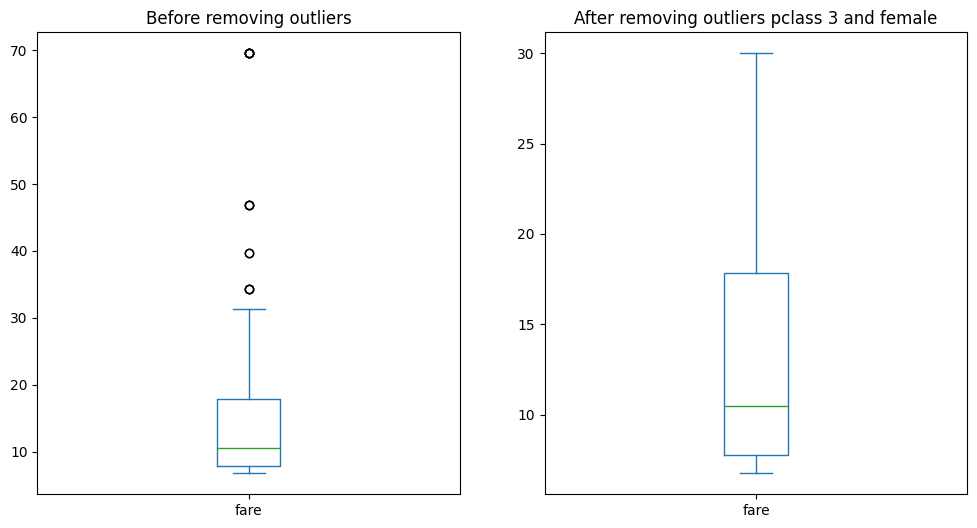

In [21]:

# Aykırı değerler temizlenmeden önceki boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'female')]['fare'].plot(kind='box')
plt.title('Before removing outliers')


def remove_values_above_threshold_for_fare(data, pclass, sex, threshold):
    condition = (data['pclass'] == pclass) & (data['sex'] == sex) & (data['fare'] > threshold)
    data.loc[condition, 'fare'] = threshold
    return data

cleaned_data = remove_values_above_threshold_for_fare(titanic, 3, 'female', 30)


print("\nAfter removing values above 30:")
print(cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'female')]['fare'].describe())

# Aykırı değerler temizlendikten sonraki boxplot
plt.subplot(1, 2, 2)
cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'female')]['fare'].plot(kind='box')
plt.title('After removing outliers pclass 3 and female')

plt.show()




After removing values above 30:
count    492.000000
mean       9.474964
std        3.197826
min        0.000000
25%        7.750000
50%        7.895800
75%        9.586450
max       15.000000
Name: fare, dtype: float64


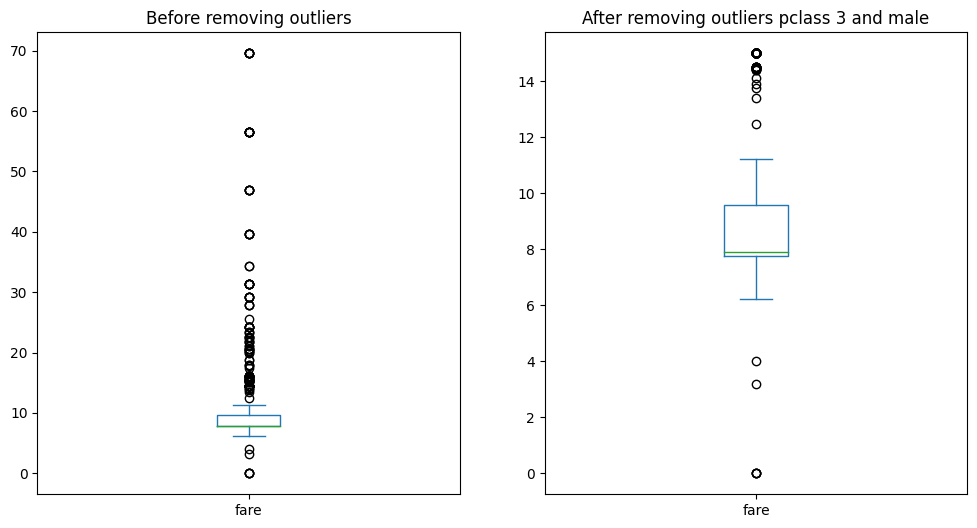

In [22]:

# Aykırı değerler temizlenmeden önceki boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
titanic[(titanic['pclass'] == 3) & (titanic['sex'] == 'male')]['fare'].plot(kind='box')
plt.title('Before removing outliers')


def remove_values_above_threshold_for_fare_male(data, pclass, sex, threshold):
    condition = (data['pclass'] == pclass) & (data['sex'] == sex) & (data['fare'] > threshold)
    data.loc[condition, 'fare'] = threshold
    return data

cleaned_data = remove_values_above_threshold_for_fare_male(titanic, 3, 'male', 15)


print("\nAfter removing values above 30:")
print(cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'male')]['fare'].describe())

# Aykırı değerler temizlendikten sonraki boxplot
plt.subplot(1, 2, 2)
cleaned_data[(cleaned_data['pclass'] == 3) & (cleaned_data['sex'] == 'male')]['fare'].plot(kind='box')
plt.title('After removing outliers pclass 3 and male')

plt.show()



In [23]:
# Removing outliers in the 'Age' column using the remove_outliers_iqr function
titanic = remove_outliers_iqr(titanic, 'age')
# Removing outliers in the 'Fare' column using the remove_outliers_std function
titanic = remove_outliers_std(titanic, 'fare')

titanic = remove_values_above_threshold_for_fare(titanic, 3, 'female', 20)

titanic = remove_values_above_threshold_for_fare_male(titanic, 3, 'male', 30)


# In both cases, the DataFrame titanic is being reassigned the value returned by each respective function,
# effectively updating titanic with the cleaned data after removing outliers in 'Age' and 'Fare'

# Saving the cleaned dataset to a new CSV file
titanic.to_csv('Titanic_cleaned.csv', index=False)

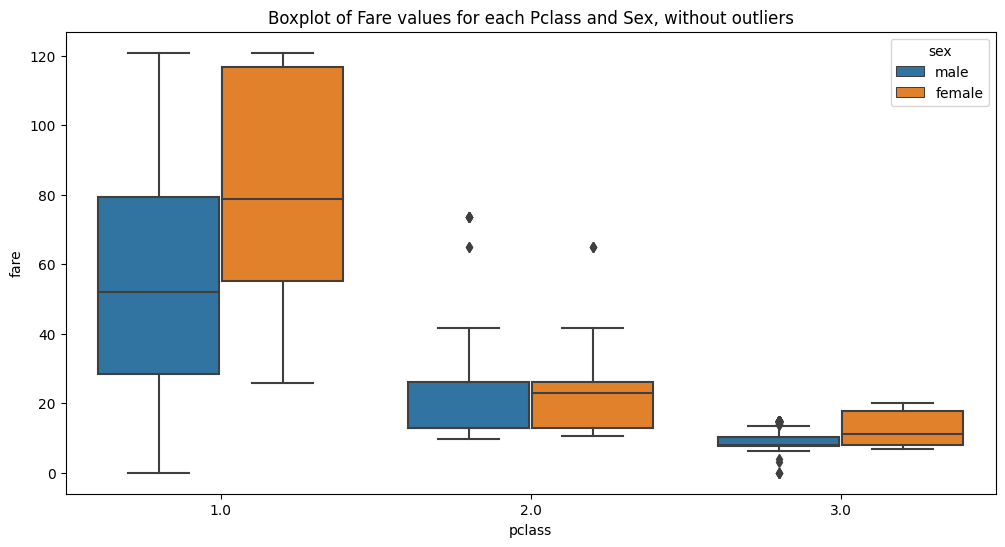

In [24]:
import seaborn as sns

# Boxplot of 'Fare' values for each 'pclass' and 'sex', without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='pclass', y='fare', hue='sex', data=titanic, hue_order=['male', 'female'])
plt.title('Boxplot of Fare values for each Pclass and Sex, without outliers')
plt.show()
